In [11]:
# インポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix, isspmatrix
import scipy.sparse as sp
import statsmodels.api as sm
from decimal import Decimal, ROUND_HALF_UP
from sklearn.metrics import mean_squared_error
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ロジスティック回帰スクラッチ

ロジスティック回帰のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。


以下に雛形を用意してあります。このScratchLogisticRegressionクラスにコードを書き加えていってください。推定関係のメソッドは線形回帰と異なり、ラベルを出力するpredictメソッドと、確率を出力するpredict_probaメソッドの2種類を作成します。

In [12]:
# 雛形

class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録

    """
    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass

    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        pass
        return
    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        pass
        return

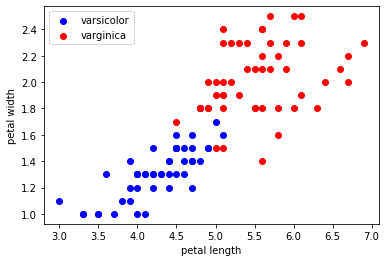

In [13]:
# irisデータセットを読み込みデータとして利用する。
# ここではpetal_width, petal_length, varsicolor, varginicaのみ利用する。varsicolor=0, varginica=1

iris = load_iris()
X = iris.data[50:, 2:]
y = iris.target[50:] -1
# plt.figure(figsize=(10, 5))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='varsicolor')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='varginica')
plt.legend();

In [14]:
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size=0.5, random_state=50)
print(X_train, X_test, y_train, y_test)

# 標準化する

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print(X_train_std, X_test_std)

[[4.7 1.4]
 [4.2 1.3]
 [5.  1.7]
 [4.3 1.3]
 [4.5 1.5]
 [5.3 2.3]
 [3.3 1. ]
 [4.8 1.8]
 [5.3 1.9]
 [5.2 2. ]
 [4.9 1.8]
 [4.9 1.8]
 [5.  2. ]
 [3.5 1. ]
 [4.7 1.4]
 [5.1 1.9]
 [3.5 1. ]
 [5.7 2.1]
 [6.7 2.2]
 [5.5 1.8]
 [5.1 2. ]
 [5.6 1.4]
 [6.1 2.3]
 [3.8 1.1]
 [5.4 2.1]
 [3.9 1.1]
 [5.1 1.5]
 [5.1 2.4]
 [4.6 1.4]
 [4.1 1.3]
 [3.7 1. ]
 [3.3 1. ]
 [4.8 1.8]
 [4.7 1.6]
 [4.8 1.4]
 [4.5 1.6]
 [5.6 2.1]
 [6.9 2.3]
 [4.9 2. ]
 [4.9 1.5]
 [4.5 1.3]
 [4.9 1.5]
 [5.9 2.3]
 [5.7 2.3]
 [4.6 1.5]
 [5.7 2.5]
 [5.1 1.6]
 [4.2 1.5]
 [5.  1.9]
 [3.  1.1]] [[6.1 1.9]
 [5.8 1.6]
 [4.4 1.4]
 [4.4 1.4]
 [4.  1.3]
 [4.4 1.2]
 [5.6 1.8]
 [4.1 1. ]
 [6.3 1.8]
 [6.  2.5]
 [4.5 1.5]
 [5.  1.5]
 [5.5 1.8]
 [4.5 1.5]
 [4.3 1.3]
 [4.  1.3]
 [4.1 1.3]
 [5.9 2.1]
 [4.6 1.3]
 [4.5 1.5]
 [4.2 1.3]
 [6.7 2. ]
 [6.1 2.5]
 [5.1 2.3]
 [5.4 2.3]
 [3.6 1.3]
 [4.  1.3]
 [4.  1. ]
 [5.8 1.8]
 [5.6 2.2]
 [5.2 2.3]
 [5.6 2.4]
 [4.8 1.8]
 [5.8 2.2]
 [5.6 2.4]
 [4.  1.2]
 [3.9 1.2]
 [4.7 1.2]
 [4.4 1.3]
 [5.5 2.1]
 [3.9 1.4

# 【問題1】仮定関数
ロジスティック回帰の仮定関数のメソッドをScratchLogisticRegressionクラスに実装してください。


ロジスティック回帰の仮定関数は、線形回帰の仮定関数を シグモイド関数 に通したものです。シグモイド関数は以下の式で表されます。



線形回帰の仮定関数は次の式でした。



まとめて書くと、ロジスティック回帰の仮定関数は次のようになります。



$x$ : 特徴量ベクトル


$\theta$ : パラメータ（重み）ベクトル

In [15]:
# シグモイド関数にいれるための線形結合を計算する関数
def liner_hypothesis(X):
        """
        線形結合を計算する。
        Xとthetaはfit_interceptをTrueとする。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        theta : 次の形のndarray, shape(n_samples, n_features)
          係数

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形結合による予測値、hθ(X)

        """
        X = np.concatenate([np.ones((X.shape[0], 1)), X], 1)
        theta = np.random.normal(1, 0.5, (X.shape[1]))
        print(theta)
        #z = np.dot(X, theta)
        z = X @ theta
        
        return z, theta

# シグモイド関数
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))
    

In [16]:
z, theta = liner_hypothesis(X_train_std)
#print(z, theta)
s = sigmoid(z)
print(s)
print(y_train)

[1.54315723 0.08378735 0.91973185]
[0.71933418 0.66218705 0.83495068 0.66450118 0.75707867 0.95026229
 0.48273533 0.86016926 0.88941722 0.90810662 0.86141099 0.86141099
 0.90636245 0.48791206 0.71933418 0.88736232 0.48791206 0.92816504
 0.94678624 0.86866815 0.90723821 0.73777262 0.95403739 0.54959128
 0.92606451 0.55215508 0.76832983 0.95873274 0.71723733 0.65986513
 0.49309139 0.48273533 0.86016926 0.79798497 0.72142153 0.79462336
 0.92747106 0.95753876 0.90547928 0.76462031 0.66910573 0.76462031
 0.95312    0.95218522 0.75897936 0.96844657 0.80458445 0.75131577
 0.88632242 0.52899732]
[0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1
 1 1 0 0 0 1 1 0 1 0 0 1 0]


In [17]:
# scikit-learn
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train_std,y_train)
y_pred_clf = clf.predict_proba(X_train_std)
y_pred_clf

array([[0.85205588, 0.14794412],
       [0.96170739, 0.03829261],
       [0.44735604, 0.55264396],
       [0.95341666, 0.04658334],
       [0.84692591, 0.15307409],
       [0.02869884, 0.97130116],
       [0.9983634 , 0.0016366 ],
       [0.4374579 , 0.5625421 ],
       [0.15134109, 0.84865891],
       [0.12250798, 0.87749202],
       [0.38790437, 0.61209563],
       [0.38790437, 0.61209563],
       [0.17370358, 0.82629642],
       [0.99753773, 0.00246227],
       [0.85205588, 0.14794412],
       [0.21167927, 0.78832073],
       [0.99753773, 0.00246227],
       [0.03102254, 0.96897746],
       [0.00263198, 0.99736802],
       [0.1565672 , 0.8434328 ],
       [0.14625917, 0.85374083],
       [0.4772706 , 0.5227294 ],
       [0.00571498, 0.99428502],
       [0.99290229, 0.00709771],
       [0.05585109, 0.94414891],
       [0.99130449, 0.00869551],
       [0.61841497, 0.38158503],
       [0.02760121, 0.97239879],
       [0.87604096, 0.12395904],
       [0.9685712 , 0.0314288 ],
       [0.

In [18]:
np.insert(clf.coef_, 0, clf.intercept_)

array([-0.25827918,  1.65467965,  1.91102205])

# 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。



$\alpha$ : 学習率


$i$ : サンプルのインデックス


$j$ : 特徴量のインデックス


$m$ : 入力されるデータの数


$h_\theta()$ : 仮定関数


$x$ : 特徴量ベクトル


$\theta$ : パラメータ（重み）ベクトル


$x^{(i)}$ : i番目のサンプルの特徴量ベクトル


$y^{(i)}$ : i番目のサンプルの正解ラベル


$\theta_j$ : j番目のパラメータ（重み）


$\lambda$ : 正則化パラメータ



In [19]:
# 問題2用の単独関数

def gradient_descent(X, y):
        """
        最急降下法で最適化を行う関数

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
        訓練データ
        y : 次の形のndarray, shape (n_samples)
        目的変数

        Returns
        -------
        次の形のndarray shape( n_features)
        θのarray
        
        """
        alpha = 0.001
        m = len(y)
        X = np.concatenate([np.ones((X.shape[0], 1)), X], 1)
        theta = np.random.normal(1, 0.5, (X.shape[1]))
        print(theta)
        z = X @ theta
        
        h = 1 / (1 + np.exp(-z))
        
        error = (h - y).reshape(-1, 1)
        # print(error)
        C = 0.1
        
        theta -= np.average(error * X, axis=0) + (C * theta / m)
        
        """
        theta0,theta1 = theta[0], theta[1:]
        
        theta0 -= alpha/X.shape[0] * (np.array([[i] for i in error]) * X[0,0]).sum(axis=0)
        theta1 -= (alpha/X.shape[0] * (np.array([[i] for i in error]) * X[:,1:]).sum(axis=0)) + C / m * theta1
        """
        return theta

In [20]:
gradient_descent(X_train_std,y_train)

[1.64261886 0.58330402 0.80872027]


array([1.34652866, 0.75783397, 1.02682221])

In [21]:
lr_theta = np.insert(clf.coef_, 0, clf.intercept_)
lr_theta

array([-0.25827918,  1.65467965,  1.91102205])

# 【問題3】推定
推定する仕組みを実装してください。ScratchLogisticRegressionクラスの雛形に含まれるpredictメソッドとpredict_probaメソッドに書き加えてください。


仮定関数 $h_\theta(x)$ の出力がpredict_probaの返り値、さらにその値に閾値を設けて1と0のラベルとしたものがpredictの返り値となります。



In [22]:
def predict_proba(X):
    X = np.concatenate([np.ones((X.shape[0], 1)), X], 1)
    #print(X)
    theta = np.random.normal(1, 0.5, (X.shape[1]))
    #print(theta)
    z = np.dot(X, theta)
    #print(z)
    s = (1 / (1 + np.exp(-z)))
    #print(s)
    
    proba = s.reshape(-1,1)
    test = 1-s.reshape(-1,1)
    proba = np.concatenate([test, proba], 1)
    
    
    return proba

    
def predict(X, threshold = 0.5):
    #return predict_proba(X).round()
    p = predict_proba(X) >= threshold
    return np.where(p == 1)[1]

In [23]:
proba = predict_proba(X_test_std)
tmp = pd.DataFrame(proba)
tmp['y'] = y_test
tmp


,0,1,y
0,0.055877,0.944123,1
1,0.121280,0.878720,1
2,0.519811,0.480189,0
3,0.519811,0.480189,0
4,0.675972,0.324028,0
5,0.597387,0.402613,0
6,0.114409,0.885591,1
7,0.747190,0.252810,0
8,0.051239,0.948761,1
9,0.025372,0.974628,1


In [24]:
tmp['pred'] = predict(X_test_std)
tmp

,0,1,y,pred
0,0.055877,0.944123,1,1
1,0.121280,0.878720,1,1
2,0.519811,0.480189,0,1
3,0.519811,0.480189,0,1
4,0.675972,0.324028,0,0
5,0.597387,0.402613,0,0
6,0.114409,0.885591,1,1
7,0.747190,0.252810,0,0
8,0.051239,0.948761,1,1
9,0.025372,0.974628,1,1


In [25]:
clf.predict_proba(X_test_std)

array([[0.03352789, 0.96647211],
       [0.19795927, 0.80204073],
       [0.91409952, 0.08590048],
       [0.91409952, 0.08590048],
       [0.97423766, 0.02576234],
       [0.96315802, 0.03684198],
       [0.13139972, 0.86860028],
       [0.99164364, 0.00835636],
       [0.03485276, 0.96514724],
       [0.00286271, 0.99713729],
       [0.84692591, 0.15307409],
       [0.66540392, 0.33459608],
       [0.1565672 , 0.8434328 ],
       [0.84692591, 0.15307409],
       [0.95341666, 0.04658334],
       [0.97423766, 0.02576234],
       [0.9685712 , 0.0314288 ],
       [0.02081971, 0.97918029],
       [0.9171984 , 0.0828016 ],
       [0.84692591, 0.15307409],
       [0.96170739, 0.03829261],
       [0.00644135, 0.99355865],
       [0.00233417, 0.99766583],
       [0.04259492, 0.95740508],
       [0.02351263, 0.97648737],
       [0.98847128, 0.01152872],
       [0.97423766, 0.02576234],
       [0.99317955, 0.00682045],
       [0.09129475, 0.90870525],
       [0.02445175, 0.97554825],
       [0.

# 【問題4】目的関数
以下の数式で表されるロジスティック回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。


なお、この数式には正則化項が含まれています。


＊数式が見切れる場合、DIVERを全画面にして御覧ください。

$$
J(\theta)=\frac{1}{m}\sum_{i=1}^{m} [−y^\left(i\right)log(h_\theta(x^\left(i\right)))−(1−y^\left(i\right))log(1−h_\theta(x^\left(i\right))]+\frac{\lambda}{2m}\sum_{j=1}^{n} \theta_{j}^{2}
$$

$m$ : 入力されるデータの数


$h_\theta()$ : 仮定関数


$x$ : 特徴量ベクトル


$\theta$ : パラメータ（重み）ベクトル


$x^{(i)}$ : i番目のサンプルの特徴量ベクトル


$y^{(i)}$ : i番目のサンプルの正解ラベル


$\theta_j$ : j番目のパラメータ（重み）


$n$ : 特徴量の数


$λ$ : 正則化パラメータ



In [26]:
def loss_Function(X, y):
    m = len(y)
    X = np.concatenate([np.ones((X.shape[0], 1)), X], 1)
    theta = np.random.normal(1, 0.5, (X.shape[1]))
    #print(theta)
    z = np.dot(X, theta)
        
    h = 1 / (1 + np.exp(-z))
    #print(h)
    #print(y)
    error = h - y

    C = 0.1
    
    #j = -1*(1/m)*(np.log(h).T.dot(y)  -  np.log(1-h).T.dot(1-y))
    
    j = (-(y * np.log(h) - (1-y) * np.log(1-h))).sum(axis=0) + ((C / 2*m) * theta**2)*  (1/m)

    return j

In [27]:
loss_Function(X_train_std,y_train)

array([-15.00342242, -15.02746147, -15.0163056 ])

# 【問題5】学習と推定
機械学習スクラッチ入門のSprintで用意したirisデータセットのvirgicolorとvirginicaの2値分類に対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。


AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [28]:
# クラスの清書

class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録

    """
    def __init__(self, num_iter=100, lr=0.1,C=1.0, bias=False, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.C = C
        self.no_bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.intercept_ = 0
        self.loss = np.zeros([self.iter])
        self.val_loss = np.zeros([self.iter])
        
    def _preprocessing_data(self, X, y):
        """
        入力時にデータの状態を確認して整形する関数
        
        parameters
        -----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        
        """
        
        # サイズ確認
        if X.shape[0] != y.shape[0]:
            raise Exception("n_samples must be the same size")
        
        # ndarray変換
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(X, pd.Series):
            X = X.values.reshape((-1,1))
        
        if isinstance(y, pd.DataFrame):
            y = y.values
        if isinstance(y, pd.Series):
            y = y.values
        
        # Xが(n_samples,)のndarrayだった場合
        if X.shape[0] == X.size:
            X = X.reshape((-1,1))
        
        # no_bias=Falseで0列目にnp.onesを追加
        if self.no_bias == False:
            X = np.hstack((np.ones((X.shape[0],1)), X))
        
        # 配列のサイズを取得
        self.m = X.shape[0]
        self.n = X.shape[1]
        
        return X, y


    def _sigmoid(self, X):
        """
        シグモイド関数
        
        Parameters
        ----------
        z :　次の形のndarray, shape (n_samples, 1)
          線形結合による予測値、hθ(X)
        
        Returns
        -------
        次の形のndarray, shape (n_samples, 1)
          予測値、hθ(X)をシグモイド関数によって0<=z<=1に変換したもの
        """
        #print("シグモイドの中のX :{}".format(X.shape))
        #print("シグモイドの中のz :{}".format(z.shape))
        
        z = np.dot(X, self.coef_.T)
        return (1 / (1 + np.exp(-z)))
    
    def _error_calc(self, y, h):
        """
        error を計算する関数
        
        Parameters
        ----------
        y : 次の形のndarray, shape (n_samples)
        目的変数
        h : 次の形のndarray, shape (n_samples)
         予測値

        Returns
        -------
        次の形のndarray, shape (n_samples)
        誤差のarray
        
        """
        #print(h)
        error = (h - y).reshape(-1, 1)
        
        return error
    
    
    def _gradient_descent(self, X, error):
        """
        最急降下法で最適化を行う関数

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
        訓練データ
        y : 次の形のndarray, shape (n_samples)
        目的変数

        Returns
        -------
        次の形のndarray shape( n_features)
        θのarray
        
        """
        
        if self.no_bias == False:
            self.intercept_ -=  self.lr * np.average(error * X[:,0], axis=0) 
            #self.coef_ =  self.lr * self.coef_ - np.average(error * X, axis=0) + (self.C / self.m) * self.coef_
            self.coef_ =  self.coef_ -  self.lr * (np.average(error * X, axis=0) + (self.C / self.m) * self.coef_)
            self.coef_[0] = self.intercept_[0]
            return self.coef_
        else:
            self.coef_ -= self.lr * np.average(error * X, axis=0) + (self.C / self.m) * self.coef_
            return self.coef_
        
        
    
    def _loss_function(self, X, y):
        
        h = self._sigmoid(X)
        loss = np.average(-(y * np.log(h)) - (1-y) * np.log(1-h))
        j = loss + ((self.C / (2*self.m)) * sum(self.coef_**2))
        
        #print(j)
        return  j
    

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.no_bias == False:
            self.coef_ = np.random.normal(0, 0.5, (X.shape[1]+1))
        else:
            self.coef_ = np.random.normal(0, 0.5, (X.shape[1]))
        
        #print(self.coef_)
        
        # データ整形
        X, y = self._preprocessing_data(X, y)
        if (X_val is not None) and (y_val is not None):
            X_val, y_val = self._preprocessing_data(X_val, y_val)
        
        # メイン部分
        for i in range(self.iter):
            # 識別関数
            h = self._sigmoid(X)
        
            # errorを算出
            error = self._error_calc(y, h)
            
            # gradient_descentで最急降下法実施、coef_を更新
            self.coef_ = self._gradient_descent(X, error)
                        
            # lossを算出、このlossを小さくしていくのがこのクラスの目的
            self.loss[i] = self._loss_function(X, y)
            
            #print(self.loss[i])
            
            # 検証データが変数に入れられていた場合、そっちも計算
            if (X_val is not None) and (y_val is not None):
                self.val_loss[i] = self._loss_function(X_val, y_val)
                if self.verbose == True:
                    print("iter : {} [val_loss : {:e}]".format(i, self.val_loss[i]))
        
                
            # 学習過程の出力可否
            if self.verbose == True:
                print("iter : {} [train_loss : {:e}]".format(i, self.loss[i]))        
                
        #return self.loss, self.coef_
                
        


    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 2)
            ロジスティック回帰による推定結果、確率での出力
        """
        # Xが(n_samples,)のndarrayだった場合
        if X.shape[0] == X.size:
            X = X.reshape((-1,1))
            
        # no_bias=Falseで0列目にnp.onesを追加
        if self.no_bias == False:
            X = np.concatenate([np.ones((X.shape[0], 1)), X], 1)
        
        #print(X.shape)
        #print(self.coef_)
        
        h = self._sigmoid(X)
        one_proba = h.reshape(-1,1)
        zero_proba = 1- h.reshape(-1,1)
        proba = np.concatenate([zero_proba, one_proba], 1)

        return proba
        
        
    def predict(self, X, threshold=0.5):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        p = self.predict_proba(X) >= threshold
        #print(p)
        return np.where(p == 1)[1]    


In [33]:
# インスタンス作成
scratch = ScratchLogisticRegression(num_iter=10000, lr=0.001,C=1.0, bias=False, verbose=0)

In [43]:
# fit、lossを変数に代入
scratch.fit(X_train_std,y_train, X_test_std, y_test)


In [44]:
# スクラッチ関数の重み
scratch.coef_

array([-0.14251837,  1.12640129,  1.19193546])

In [45]:
# logisticregressionの重み
lr_theta

array([-0.25827918,  1.65467965,  1.91102205])

In [46]:
# logisticregressionのpredict、predict_proba

lr_proba = clf.predict_proba(X_test_std)
lr_pred = clf.predict(X_test_std)

In [47]:
#print(lr_proba)
#print(lr_pred)
print(y_test)
print("正解率 :{}".format(accuracy_score(y_test, lr_pred)))

[1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0
 0 0 1 0 0 0 1 1 1 1 1 0 1]
正解率 :0.96


In [48]:
# スクラッチ関数のpredict、predict_proba

scratch_proba = scratch.predict_proba(X_test_std)
scratch_pred = scratch.predict(X_test_std)

In [49]:
#print(scratch_proba)
#print(scratch_pred)
print(y_test)

print("正解率 :{}".format(accuracy_score(y_test, scratch_pred)))

[1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0
 0 0 1 0 0 0 1 1 1 1 1 0 1]
正解率 :0.96


In [50]:
hoge = lr_pred - scratch_pred

comp = pd.DataFrame(data=None)
comp = pd.DataFrame([lr_pred, scratch_pred, hoge])
comp.index = ["lr", "scratch", "comparison"]
comp.T

,lr,scratch,comparison
0,1,1,0
1,1,1,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,1,1,0
7,0,0,0
8,1,1,0
9,1,1,0


# 【問題6】学習曲線のプロット
学習曲線を見て損失が適切に下がっているかどうか確認してください。

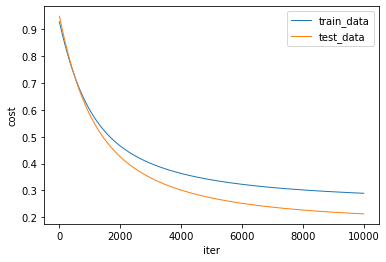

In [51]:
#plt.figure(figsize=(10,5))

plt.plot([i for i in range(scratch.iter)], scratch.loss, linewidth = 1, label='train_data')
plt.plot([i for i in range(scratch.iter)], scratch.val_loss, linewidth = 1, label='test_data')
#plt.plot([i for i in range(tmp.iter)], tmp.val_loss, linewidth = 5, label='test_data')
#plt.xlim(0, 10)
plt.xlabel('iter')
plt.ylabel('cost')
plt.legend()
plt.show()

# 【問題7】決定領域の可視化
決定領域を可視化してください。



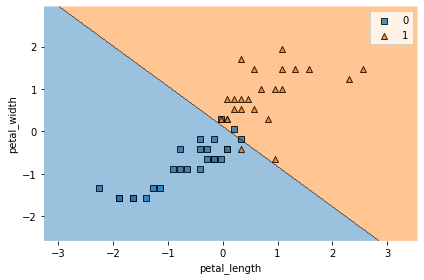

In [52]:
# mlxtendで可視化
from mlxtend.plotting import plot_decision_regions

X = X_train_std
y = y_train

#tmp = LogisticRegression().fit(X, y)

plot_decision_regions(X=X, y=y,clf=scratch)
plt.xlabel('petal_length')
plt.ylabel('petal_width')

plt.legend()

plt.tight_layout()
plt.show()



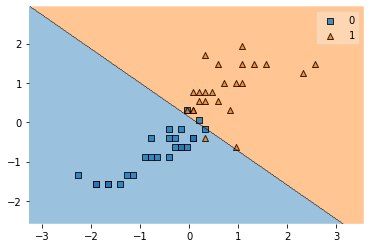

In [53]:
plot_decision_regions(X=X, y=y,clf=clf)

# 【問題8】（アドバンス課題）重みの保存
検証が容易になるように、学習した重みを保存および読み込みができるようにしましょう。pickleモジュールやNumPyのnp.savezを利用します。

In [54]:
scratch.coef_

array([-0.14251837,  1.12640129,  1.19193546])

In [55]:
import pickle

weight = scratch.coef_
with open('weight_log', 'wb') as log:
    pickle.dump(weight , log)

In [56]:
with open('weight_log', 'rb') as log:
    weight_log = pickle.load(log)
print(weight_log)

[-0.14251837  1.12640129  1.19193546]


In [57]:
test = ScratchLogisticRegression(num_iter=10000, lr=0.01,C=1.0, bias=False, verbose=True)
test.coef_ = weight_log

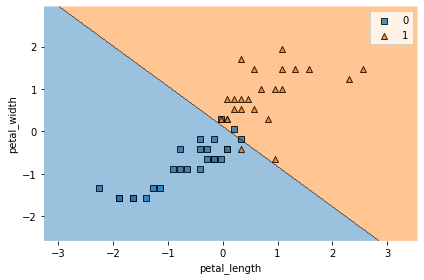

In [58]:
plot_decision_regions(X=X, y=y,clf=test)
plt.xlabel('petal_length')
plt.ylabel('petal_width')

plt.legend()

plt.tight_layout()
plt.show()
